<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PW1_red_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Details

This dataset consists of 638 images collected by Roboflow from two aquariums in the United States: The Henry Doorly Zoo in Omaha (October 16, 2020) and the National Aquarium in Baltimore (November 14, 2020). The images were labeled for object detection by the Roboflow team (with some help from SageMaker Ground Truth). Images and annotations are released under a Creative Commons By-Attribution license. You are free to use them for any purposes personal, commercial, or academic provided you give acknowledgement of their source.

## Class Breakdown

The following classes are labeled: fish, jellyfish, penguins, sharks, puffins, stingrays, and starfish. Most images contain multiple bounding boxes.

In [24]:
!pip install opencv-python
import zipfile
import io
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image

ruta_zip = "/content/practica_1_dataset (1).zip"

with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()

    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("train/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta train dentro del ZIP.")

    imagenes_en_train = {f for f in archivos_en_zip if f.startswith("train/") and f.endswith((".jpg", ".png"))}

    df_train = df_annotations[df_annotations['filename'].apply(lambda x: f"train/{x}" in imagenes_en_train)].copy()

    def cargar_imagen(filename):
        ruta_imagen = f"train/{filename}"
        if ruta_imagen in imagenes_en_train:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))
        return None

    df_train['imagen'] = df_train['filename'].apply(cargar_imagen)

df_train


filename  width  height  \
0     IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
...                                                 ...    ...     ...   
3319  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3320  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3321  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3322  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   
3323  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2         fish   638   490   678   672   
3         fish   625   107   765   187   
4         fish   818   419   830   499   
...        ...   ...   ...   ...   ...   
3319      fish   248   414   283   438   
3320      fish   314   409   333   417   
3321  stingray   122   343   352   433   
3322      fish   499   245   575   361   
3323     shark     0   493   523   670   

                                                 imagen  
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
...                                                 ...  
3319  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3320  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3321  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3322  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3323  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[3324 rows x 9 columns]

In [25]:
df_train.head(20)

filename  width  height  \
0   IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
5   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
6   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
7   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
8   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
9   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
10  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
11  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
12  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
13  IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
14  IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
15  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
16  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
17  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
18  IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   
19  IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   

       class  xmin  ymin  xmax  ymax  \
0   starfish   302   410   534   730   
1      shark   106   442   175   640   
2       fish   638   490   678   672   
3       fish   625   107   765   187   
4       fish   818   419   830   499   
5       fish   811    24   942    81   
6       fish   860   450   904   495   
7       fish   627   690   651   735   
8       fish   894   515   943   560   
9       fish   586   135   628   168   
10      fish   514   587   555   617   
11      fish   465   407   503   432   
12      fish   503   390   531   412   
13  starfish    35   504   394   844   
14  starfish   540   371   742   641   
15    puffin    91   392   571   823   
16    puffin    67   332   127   397   
17    puffin   615   117   755   187   
18    puffin   424   517   667   643   
19    puffin   458   257   563   356   

                                               imagen  
0   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
5   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
6   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
7   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
8   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
9   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
10  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
11  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
12  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
13  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
14  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
15  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
16  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
17  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
18  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
19  <PIL.JpegImagePlugin.JpegImageFile image mode=...

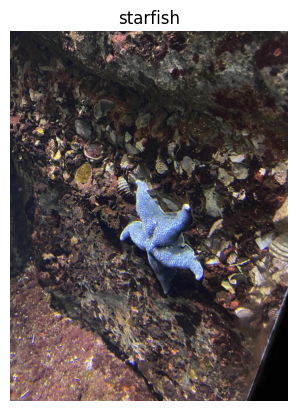

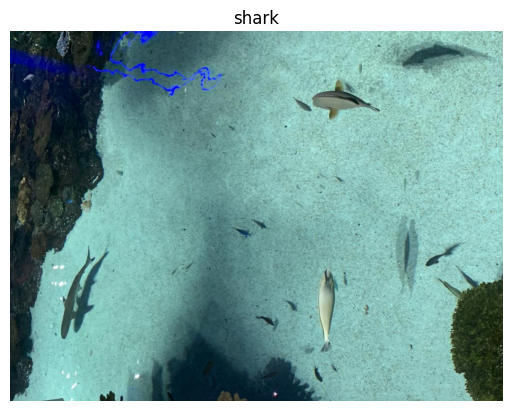

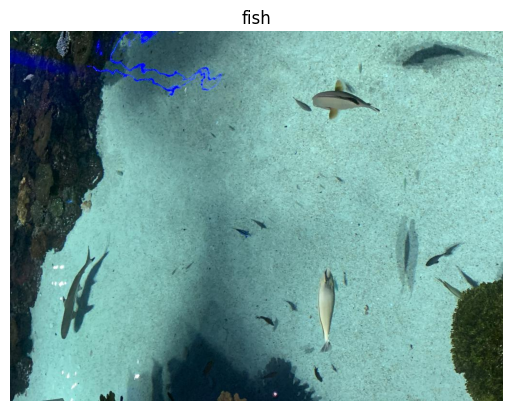

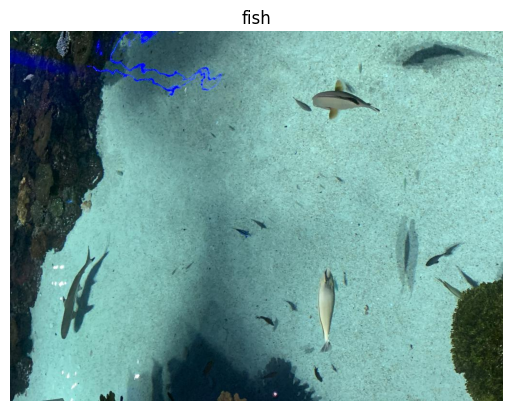

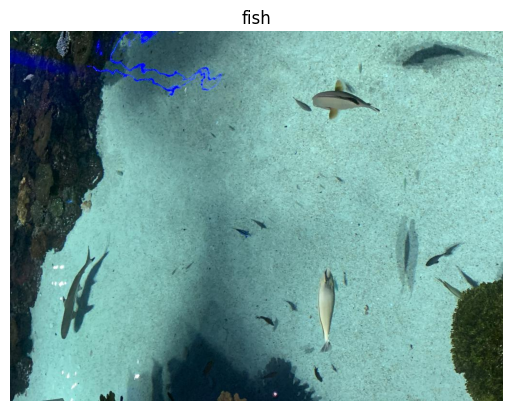

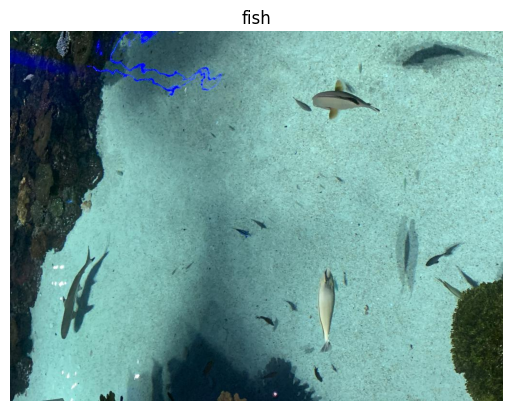

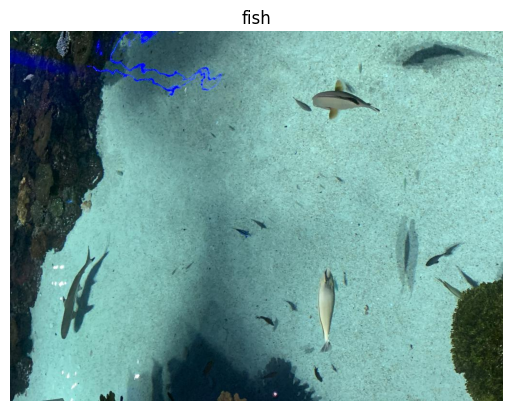

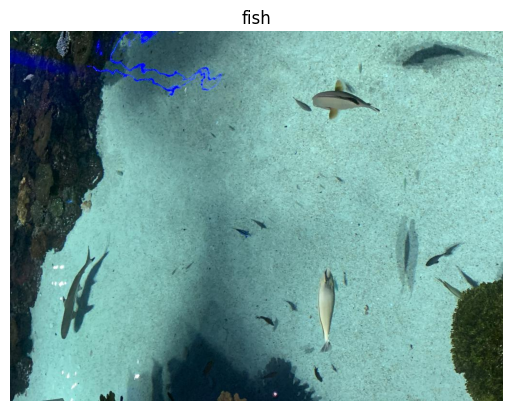

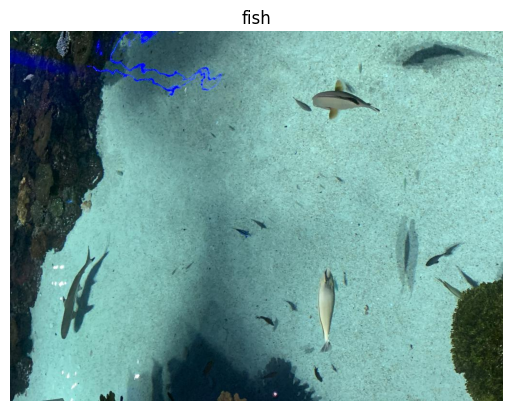

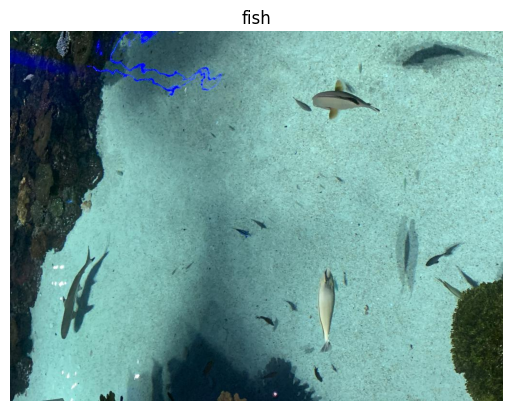

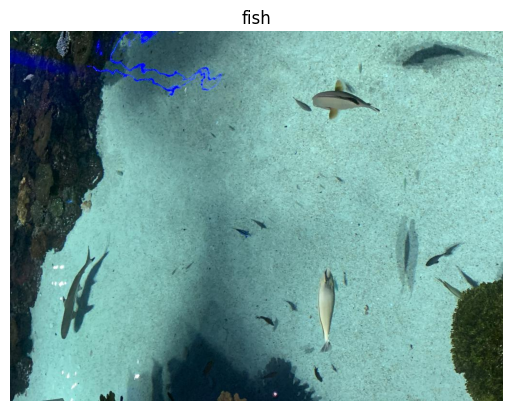

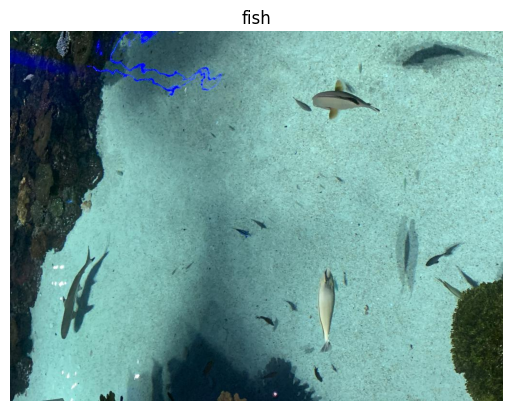

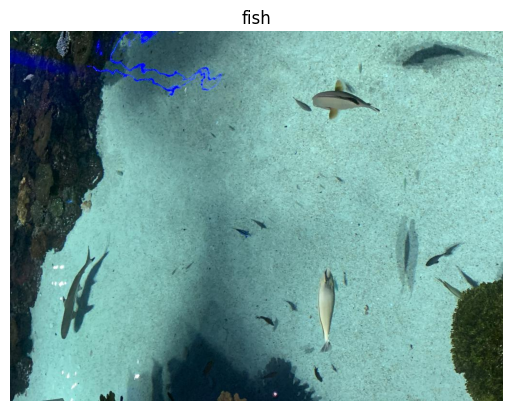

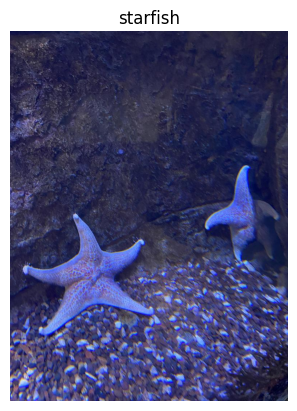

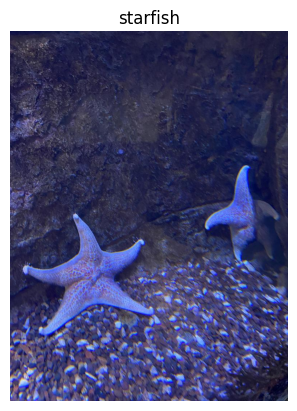

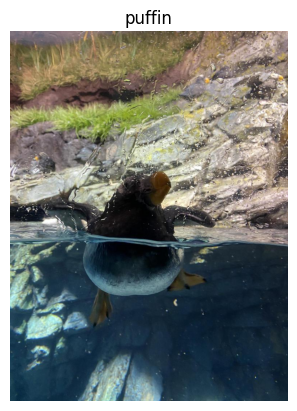

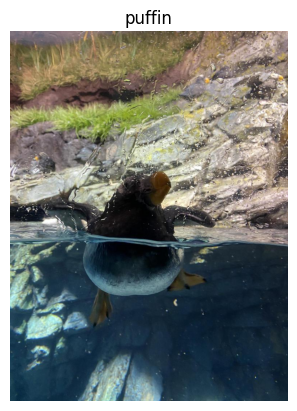

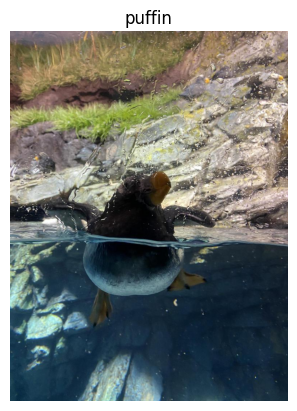

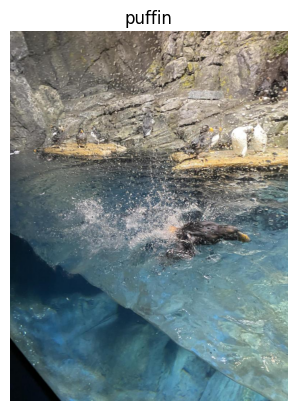

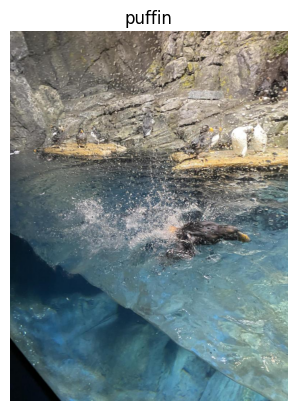

In [26]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes del DataFrame
for _, row in df_train.head(20).iterrows():
    plt.imshow(row['imagen'])
    plt.title(row['class'])  # Muestra la etiqueta de la imagen
    plt.axis("off")
    plt.show()


No es que haya imágenes repetidas, es que hay imágenes con varios animales. No hay registros que sean exactamente iguales.

 A lo mejor sería interesante crear un nuevo data frame en el que se utilizaran los recuadros que contienen a animales individuales, de manera que, en vez de tener 5 registros con la misma foto conteniendo 5 animales, se tuvieran 5 registros con las 5 secciones de la foto original correspondiente a cada uno de los animales.

Ahora vamos a probar a hacer un reetiquetado de las imágenes, de manera que a cada imagen solo le corresponda una etiqueta aunque haya varios animales en ella. Esa primera etiqueta se seleccionará para el animal con la puntuación más alta. Dicha puntuación se calculará de la siguiente manera:

`área de cada uno de los animales en una imagen x 2^numero de veces que aparecen`


In [28]:
# Cargar y preprocesar los datos
# Calcular el área de cada animal
df_train['area'] = (df_train['xmax'] - df_train['xmin']) * (df_train['ymax'] - df_train['ymin'])

# Contar la frecuencia de cada clase en cada imagen
class_counts = df_train.groupby(['filename', 'class']).size().reset_index(name='count')
df_train = df_train.merge(class_counts, on=['filename', 'class'])

# Aplicar la fórmula anterior
df_train['score1'] = df_train['area'] * (2 ** df_train['count'])

# Determinar la nueva etiqueta por imagen
class1 = df_train.loc[df_train.groupby('filename')['score1'].idxmax(), ['filename', 'class']]
class1.rename(columns={'class': 'class1'}, inplace=True)
df_train = df_train.merge(class1, on='filename')

In [29]:
# Función para obtener el animal con mayor 'count' en cada grupo de 'filename'
def calculate_score(group):
    # Seleccionar el registro con mayor valor de 'count'
    max_count_row = group.loc[group['count'].idxmax()]
    return pd.Series({
        'score2': max_count_row['area'] * (2 ** max_count_row['count']),
        'class2': max_count_row['class']
    })

# Agrupar por 'filename' y calcular la columna 'score1'
df_train_grouped = df_train.groupby('filename').apply(calculate_score).reset_index()

# Juntar resultados en el DataFrame original
df_train = df_train.merge(df_train_grouped[['filename', 'score2', 'class2']], on='filename', how='left')


<ipython-input-29-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-29-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-29-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-29-7804ca4b70ec>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby('filename').apply(calculate_score).reset_index()


In [30]:
# Función para obtener el animal con mayor 'area' en cada grupo de 'filename'
def calculate_area_score(group):
    # Seleccionar el registro con el mayor valor de 'area'
    max_area_row = group.loc[group['area'].idxmax()]
    return pd.Series({
        'score3': max_area_row['area'],
        'class3': max_area_row['class']  # Etiqueta del animal con mayor área
    })

# Agrupar por 'filename' y calcular la columna 'score3'
df_train_grouped_area = df_train.groupby('filename').apply(calculate_area_score).reset_index()

# Merge de los resultados en el DataFrame original
df_train = df_train.merge(df_train_grouped_area[['filename', 'score3', 'class3']], on='filename', how='left')



<ipython-input-30-b6385064ee24>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped_area = df_train.groupby('filename').apply(calculate_area_score).reset_index()


In [31]:
df_train['score4'] = df_train['area'] * df_train['count']
class4 = df_train.loc[df_train.groupby('filename')['score4'].idxmax(), ['filename', 'class']]
class4.rename(columns={'class': 'class4'}, inplace=True)
df_train = df_train.merge(class4, on='filename')

El nuevo dataframe de entrenamiento tendrá las nuevas etiquetas que se usarán para entrenar a los modelos.

In [32]:
df_train

filename  width  height  \
0     IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
...                                                 ...    ...     ...   
3319  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3320  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3321  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3322  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   
3323  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2         fish   638   490   678   672   
3         fish   625   107   765   187   
4         fish   818   419   830   499   
...        ...   ...   ...   ...   ...   
3319      fish   248   414   283   438   
3320      fish   314   409   333   417   
3321  stingray   122   343   352   433   
3322      fish   499   245   575   361   
3323     shark     0   493   523   670   

                                                 imagen   area  count  \
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...  74240      1   
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...  13662      1   
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...   7280     11   
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...  11200     11   
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...    960     11   
...                                                 ...    ...    ...   
3319  <PIL.JpegImagePlugin.JpegImageFile image mode=...    840     10   
3320  <PIL.JpegImagePlugin.JpegImageFile image mode=...    152     10   
3321  <PIL.JpegImagePlugin.JpegImageFile image mode=...  20700      1   
3322  <PIL.JpegImagePlugin.JpegImageFile image mode=...   8816      1   
3323  <PIL.JpegImagePlugin.JpegImageFile image mode=...  92571      1   

        score1    class1    score2    class2  score3    class3  score4  \
0       148480  starfish    148480  starfish   74240  starfish   74240   
1        27324      fish  14909440      fish   13662     shark   13662   
2     14909440      fish  14909440      fish   13662     shark   80080   
3     22937600      fish  14909440      fish   13662     shark  123200   
4      1966080      fish  14909440      fish   13662     shark   10560   
...        ...       ...       ...       ...     ...       ...     ...   
3319    860160      fish   5511168      fish   20700  stingray    8400   
3320    155648      fish   5511168      fish   20700  stingray    1520   
3321     41400      fish   5511168      fish   20700  stingray   20700   
3322     17632     shark     17632      fish   92571     shark    8816   
3323    185142     shark     17632      fish   92571     shark   92571   

        class4  
0     starfish  
1         fish  
2         fish  
3         fish  
4         fish  
...        ...  
3319      fish  
3320      fish  
3321      fish  
3322     shark  
3323     shark  

[3324 rows x 19 columns]

Eliminamos registros iguales, es decir, los registros que tengan la misma foto, pues a partir de ahora cada foto tiene una única etiqueta en cada clase.

In [33]:
df_train = df_train.drop_duplicates(subset='filename')
df_train.reset_index(drop=True, inplace=True)
df_train

filename  width  height  \
0    IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1    IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2    IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
3    IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
4    IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   
..                                                 ...    ...     ...   
442  IMG_2540_jpeg_jpg.rf.648b31d1066b616be81fb9447...    768    1024   
443  IMG_2390_jpeg_jpg.rf.64fe0a0c9bb0459e06335b75d...    768    1024   
444  IMG_2480_jpeg_jpg.rf.65112653d4f14fcd3431eed42...    768    1024   
445  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
446  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2     starfish    35   504   394   844   
3       puffin    91   392   571   823   
4       puffin   424   517   667   643   
..         ...   ...   ...   ...   ...   
442   starfish   298   323   560   709   
443   starfish   135   467   647   810   
444  jellyfish   491   185   581   290   
445       fish   476   581   545   659   
446       fish   499   245   575   361   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   74240      1   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   13662      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  122060      2   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  206880      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...   30618     12   
..                                                 ...     ...    ...   
442  <PIL.JpegImagePlugin.JpegImageFile image mode=...  101132      1   
443  <PIL.JpegImagePlugin.JpegImageFile image mode=...  175616      1   
444  <PIL.JpegImagePlugin.JpegImageFile image mode=...    9450     15   
445  <PIL.JpegImagePlugin.JpegImageFile image mode=...    5382     10   
446  <PIL.JpegImagePlugin.JpegImageFile image mode=...    8816      1   

        score1     class1     score2     class2  score3     class3  score4  \
0       148480   starfish     148480   starfish   74240   starfish   74240   
1        27324       fish   14909440       fish   13662      shark   13662   
2       488240   starfish     488240   starfish  122060   starfish  244120   
3      1655040     puffin    1655040     puffin  206880     puffin  620640   
4    125411328     puffin  125411328     puffin   30618     puffin  367416   
..         ...        ...        ...        ...     ...        ...     ...   
442     202264   starfish     202264   starfish  101132   starfish  101132   
443     351232   starfish     351232   starfish  175616   starfish  175616   
444  309657600  jellyfish  309657600  jellyfish   10500  jellyfish  141750   
445    5511168       fish    5511168       fish   20700   stingray   53820   
446      17632      shark      17632       fish   92571      shark    8816   

        class4  
0     starfish  
1         fish  
2     starfish  
3       puffin  
4       puffin  
..         ...  
442   starfish  
443   starfish  
444  jellyfish  
445       fish  
446      shark  

[447 rows x 19 columns]

Vamos a descargar también las bases de datos de validación y test:

In [34]:
# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta valid/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("valid/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta train dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_valid = {f for f in archivos_en_zip if f.startswith("valid/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_valid = df_annotations[df_annotations['filename'].apply(lambda x: f"valid/{x}" in imagenes_en_valid)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"valid/{filename}"
        if ruta_imagen in imagenes_en_valid:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_valid['imagen'] = df_valid['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
2    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
3    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
4    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
..                                                 ...    ...     ...   
904  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
905  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
906  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
907  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
908  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

        class  xmin  ymin  xmax  ymax  \
0        fish   635    54   767   276   
1        fish   228   479   538   753   
2        fish   126   395   220   576   
3       shark   331   761   767   924   
4    starfish   430   664   602   779   
..        ...   ...   ...   ...   ...   
904    puffin   557   569   596   611   
905    puffin   439   568   490   606   
906    puffin   140   557   203   588   
907    puffin   305   389   357   420   
908    puffin   446   383   475   407   

                                                imagen  
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
..                                                 ...  
904  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
905  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
906  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
907  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
908  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[909 rows x 9 columns]

Realizamos el mismo proceso de reetiquetado con los datos de validación.

In [35]:
# Cargar y preprocesar los datos en df_valid
# Calcular el área de cada animal
df_valid['area'] = (df_valid['xmax'] - df_valid['xmin']) * (df_valid['ymax'] - df_valid['ymin'])

# Contar la frecuencia de cada clase en cada imagen
class_counts_valid = df_valid.groupby(['filename', 'class']).size().reset_index(name='count')
df_valid = df_valid.merge(class_counts_valid, on=['filename', 'class'])

# Aplicar la fórmula anterior
df_valid['score1'] = df_valid['area'] * (2 ** df_valid['count'])

# Determinar la nueva etiqueta por imagen
class1_valid = df_valid.loc[df_valid.groupby('filename')['score1'].idxmax(), ['filename', 'class']]
class1_valid.rename(columns={'class': 'class1'}, inplace=True)
df_valid = df_valid.merge(class1_valid, on='filename')

# Función para obtener el animal con mayor 'count' en cada grupo de 'filename'
def calculate_score_valid(group):
    # Seleccionar el registro con mayor valor de 'count'
    max_count_row = group.loc[group['count'].idxmax()]
    return pd.Series({
        'score2': max_count_row['area'] * (2 ** max_count_row['count']),
        'class2': max_count_row['class']
    })

# Agrupar por 'filename' y calcular la columna 'score2'
df_valid_grouped = df_valid.groupby('filename').apply(calculate_score_valid).reset_index()

# Merge de los resultados en el DataFrame original
df_valid = df_valid.merge(df_valid_grouped[['filename', 'score2', 'class2']], on='filename', how='left')

# Función para obtener el animal con mayor 'area' en cada grupo de 'filename'
def calculate_area_score_valid(group):
    # Seleccionar el registro con el mayor valor de 'area'
    max_area_row = group.loc[group['area'].idxmax()]
    return pd.Series({
        'score3': max_area_row['area'],
        'class3': max_area_row['class']  # Etiqueta del animal con mayor área
    })

# Agrupar por 'filename' y calcular la columna 'score3'
df_valid_grouped_area = df_valid.groupby('filename').apply(calculate_area_score_valid).reset_index()

# Merge de los resultados en el DataFrame original
df_valid = df_valid.merge(df_valid_grouped_area[['filename', 'score3', 'class3']], on='filename', how='left')

# Calcular score4 y determinar class4
df_valid['score4'] = df_valid['area'] * df_valid['count']
class4_valid = df_valid.loc[df_valid.groupby('filename')['score4'].idxmax(), ['filename', 'class']]
class4_valid.rename(columns={'class': 'class4'}, inplace=True)
df_valid = df_valid.merge(class4_valid, on='filename')


<ipython-input-35-9bc6c73e2c8a>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid_grouped = df_valid.groupby('filename').apply(calculate_score_valid).reset_index()
<ipython-input-35-9bc6c73e2c8a>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid_grouped_area = df_valid.groupby('filename').apply(calculate_area_score_valid).reset_index()


In [36]:
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
2    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
3    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
4    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
..                                                 ...    ...     ...   
904  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
905  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
906  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
907  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
908  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

        class  xmin  ymin  xmax  ymax  \
0        fish   635    54   767   276   
1        fish   228   479   538   753   
2        fish   126   395   220   576   
3       shark   331   761   767   924   
4    starfish   430   664   602   779   
..        ...   ...   ...   ...   ...   
904    puffin   557   569   596   611   
905    puffin   439   568   490   606   
906    puffin   140   557   203   588   
907    puffin   305   389   357   420   
908    puffin   446   383   475   407   

                                                imagen   area  count   score1  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...  29304      2   117216   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...  84940      2   339760   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  17014      1    34028   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  71068      1   142136   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  19780      2    79120   
..                                                 ...    ...    ...      ...   
904  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1638     11  3354624   
905  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1938     11  3969024   
906  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1953     11  3999744   
907  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1612     11  3301376   
908  <PIL.JpegImagePlugin.JpegImageFile image mode=...    696     11  1425408   

     class1    score2    class2  score3  class3  score4  class4  
0      fish    117216      fish   84940    fish   58608    fish  
1      fish    117216      fish   84940    fish  169880    fish  
2     shark     79120  starfish   71068   shark   17014   shark  
3     shark     79120  starfish   71068   shark   71068   shark  
4     shark     79120  starfish   71068   shark   39560   shark  
..      ...       ...       ...     ...     ...     ...     ...  
904  puffin  16293888    puffin    7956  puffin   18018  puffin  
905  puffin  16293888    puffin    7956  puffin   21318  puffin  
906  puffin  16293888    puffin    7956  puffin   21483  puffin  
907  puffin  16293888    puffin    7956  puffin   17732  puffin  
908  puffin  16293888    puffin    7956  puffin    7656  puffin  

[909 rows x 19 columns]

Eliminamos duplicados de nuevo

In [37]:
df_valid = df_valid.drop_duplicates(subset='filename')
df_valid.reset_index(drop=True, inplace=True)
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
2    IMG_2464_jpeg_jpg.rf.0121fe35073ca26afded76a7a...    768    1024   
3    IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4...    768    1024   
4    IMG_3120_jpeg_jpg.rf.05e302318ebf9502b3467828b...    768    1024   
..                                                 ...    ...     ...   
122  IMG_2637_jpeg_jpg.rf.fb8a2e97a480a468812b0217a...    768    1024   
123  IMG_2381_jpeg_jpg.rf.fc0d53c3b03994926fe019493...    768    1024   
124  IMG_2469_jpeg_jpg.rf.fca5db81cde8b6fe73b8f150e...    768    1024   
125  IMG_8535_MOV-5_jpg.rf.fe45012859267d87836726ec...   1024     576   
126  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

         class  xmin  ymin  xmax  ymax  \
0         fish   635    54   767   276   
1         fish   126   395   220   576   
2    jellyfish   457     0   644   168   
3      penguin   219   354   572   486   
4     starfish   138   316   529   680   
..         ...   ...   ...   ...   ...   
122   stingray   200   454   674   830   
123   starfish   200   427   564   783   
124  jellyfish   420     9   610   236   
125     puffin   463   374   560   492   
126     puffin   154   670   222   787   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   29304      2   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   17014      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...   31416     22   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...   46596      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  142324      1   
..                                                 ...     ...    ...   
122  <PIL.JpegImagePlugin.JpegImageFile image mode=...  178224      2   
123  <PIL.JpegImagePlugin.JpegImageFile image mode=...  129584      1   
124  <PIL.JpegImagePlugin.JpegImageFile image mode=...   43130     20   
125  <PIL.JpegImagePlugin.JpegImageFile image mode=...   11446      5   
126  <PIL.JpegImagePlugin.JpegImageFile image mode=...    7956     11   

           score1     class1        score2     class2  score3     class3  \
0          117216       fish        117216       fish   84940       fish   
1           34028      shark         79120   starfish   71068      shark   
2    131768254464  jellyfish  131768254464  jellyfish   31416  jellyfish   
3          372768    penguin        372768    penguin   46596    penguin   
4          284648   starfish        284648   starfish  142324   starfish   
..            ...        ...           ...        ...     ...        ...   
122        712896   stingray        712896   stingray  178224   stingray   
123        259168   starfish        259168   starfish  129584   starfish   
124   45225082880  jellyfish   45225082880  jellyfish   43130  jellyfish   
125        366272     puffin        366272     puffin   18824     puffin   
126      16293888     puffin      16293888     puffin    7956     puffin   

     score4     class4  
0     58608       fish  
1     17014      shark  
2    691152  jellyfish  
3    139788    penguin  
4    142324   starfish  
..      ...        ...  
122  356448   stingray  
123  129584   starfish  
124  862600  jellyfish  
125   57230     puffin  
126   87516     puffin  

[127 rows x 19 columns]

In [38]:
# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta valid/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("test/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta test dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_test = {f for f in archivos_en_zip if f.startswith("test/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_test = df_annotations[df_annotations['filename'].apply(lambda x: f"test/{x}" in imagenes_en_test)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"test/{filename}"
        if ruta_imagen in imagenes_en_test:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_test['imagen'] = df_test['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_test

filename  width  height   class  \
0    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
1    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
2    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
3    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
4    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
..                                                 ...    ...     ...     ...   
579  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
580  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
581  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
582  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
583  IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b3...    768    1024  puffin   

     xmin  ymin  xmax  ymax                                             imagen  
0     406   457   497   533  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1      18   705    82   759  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2      51   426   116   475  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3     428   331   504   376  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4       0   613    21   658  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
..    ...   ...   ...   ...                                                ...  
579     0   253    32   296  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
580   368   284   484   327  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
581   685   257   768   299  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
582   638   312   734   357  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
583   146   482   538   724  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[584 rows x 9 columns]

In [39]:
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
2    IMG_2464_jpeg_jpg.rf.0121fe35073ca26afded76a7a...    768    1024   
3    IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4...    768    1024   
4    IMG_3120_jpeg_jpg.rf.05e302318ebf9502b3467828b...    768    1024   
..                                                 ...    ...     ...   
122  IMG_2637_jpeg_jpg.rf.fb8a2e97a480a468812b0217a...    768    1024   
123  IMG_2381_jpeg_jpg.rf.fc0d53c3b03994926fe019493...    768    1024   
124  IMG_2469_jpeg_jpg.rf.fca5db81cde8b6fe73b8f150e...    768    1024   
125  IMG_8535_MOV-5_jpg.rf.fe45012859267d87836726ec...   1024     576   
126  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

         class  xmin  ymin  xmax  ymax  \
0         fish   635    54   767   276   
1         fish   126   395   220   576   
2    jellyfish   457     0   644   168   
3      penguin   219   354   572   486   
4     starfish   138   316   529   680   
..         ...   ...   ...   ...   ...   
122   stingray   200   454   674   830   
123   starfish   200   427   564   783   
124  jellyfish   420     9   610   236   
125     puffin   463   374   560   492   
126     puffin   154   670   222   787   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   29304      2   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   17014      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...   31416     22   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...   46596      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  142324      1   
..                                                 ...     ...    ...   
122  <PIL.JpegImagePlugin.JpegImageFile image mode=...  178224      2   
123  <PIL.JpegImagePlugin.JpegImageFile image mode=...  129584      1   
124  <PIL.JpegImagePlugin.JpegImageFile image mode=...   43130     20   
125  <PIL.JpegImagePlugin.JpegImageFile image mode=...   11446      5   
126  <PIL.JpegImagePlugin.JpegImageFile image mode=...    7956     11   

           score1     class1        score2     class2  score3     class3  \
0          117216       fish        117216       fish   84940       fish   
1           34028      shark         79120   starfish   71068      shark   
2    131768254464  jellyfish  131768254464  jellyfish   31416  jellyfish   
3          372768    penguin        372768    penguin   46596    penguin   
4          284648   starfish        284648   starfish  142324   starfish   
..            ...        ...           ...        ...     ...        ...   
122        712896   stingray        712896   stingray  178224   stingray   
123        259168   starfish        259168   starfish  129584   starfish   
124   45225082880  jellyfish   45225082880  jellyfish   43130  jellyfish   
125        366272     puffin        366272     puffin   18824     puffin   
126      16293888     puffin      16293888     puffin    7956     puffin   

     score4     class4  
0     58608       fish  
1     17014      shark  
2    691152  jellyfish  
3    139788    penguin  
4    142324   starfish  
..      ...        ...  
122  356448   stingray  
123  129584   starfish  
124  862600  jellyfish  
125   57230     puffin  
126   87516     puffin  

[127 rows x 19 columns]

Vamos a probar un modelo básico con diferentes datos de entrenamiento:



1.   Reetiquetado 1: puntuación1 = área del bounding box que contiene al animal x 2^nº de veces que aparece ese tipo de animal en la imagen. El tipo de animal con mayor puntuación será elegido como nueva etiqueta.
2.   Reetiquetado 2: el tipo de animal que más veces aparezca en la foto sera elegido como nueva etiqueta.
3.   Reetiquetado 3: el tipo de animal que más área tenga en la foto sera elegido como nueva etiqueta.
4.  Reetiquetado 4: puntuación4 = área del bounding box que contiene al animal x nº de veces que aparece ese tipo de animal en la imagen.



Se va a entrenar cada configuración con cada una de las 4 etiquetas nuevas, de manera que se entrenará el modelo 12 veces, y se elegirá la etiqueta que mejor parezca funcionar.

In [40]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Evaluando configuración: {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001}
Usando la etiqueta: class1


<ipython-input-41-c75a7387417b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['new_label'] = df_train[class_col]
<ipython-input-41-c75a7387417b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['new_label'] = df_valid[class_col]
<ipython-input-41-c75a7387417b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step - accuracy: 0.2385 - loss: 2.1199 - val_accuracy: 0.3937 - val_loss: 1.8228
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.4398 - loss: 1.7282 - val_accuracy: 0.4488 - val_loss: 1.6857
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.4336 - loss: 1.5762 - val_accuracy: 0.4331 - val_loss: 1.6058
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.4249 - loss: 1.4897 - val_accuracy: 0.4252 - val_loss: 1.5350
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.4358 - loss: 1.4231 - val_accuracy: 0.4094 - val_loss: 1.5247
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4488 - loss: 1.3802 - val_accuracy: 0.3622 - val_loss: 1.5559
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.4603 - loss: 1.3578 - val_accuracy: 0.4173 - val_loss: 1.3709
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.5277 - loss: 1.2278 - val_accuracy: 0.4961 - val_loss:

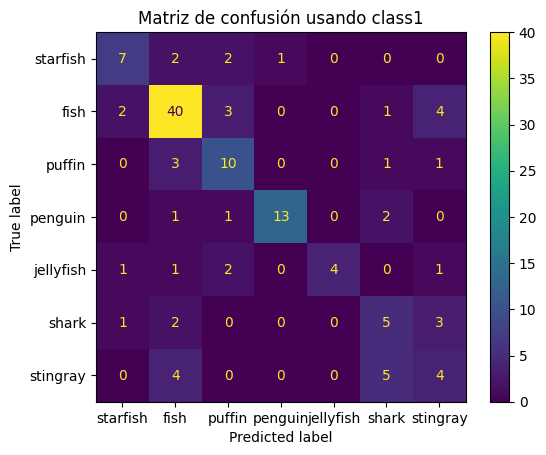

Usando la etiqueta: class2
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.2644 - loss: 1.8964 - val_accuracy: 0.4094 - val_loss: 1.7487
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.4395 - loss: 1.6890 - val_accuracy: 0.4094 - val_loss: 1.6510
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.4669 - loss: 1.5222 - val_accuracy: 0.3701 - val_loss: 1.5907
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - accuracy: 0.4672 - loss: 1.4297 - val_accuracy: 0.3543 - val_loss: 1.6180
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.4880 - loss: 1.4376 - val_accuracy: 0.4016 - val_loss: 1.5120
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.5404 - loss: 1.3167 - val_accuracy: 0.3937 - val_loss: 1.5207
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.5045 - loss: 1.3023 - val_accuracy: 0.4646 - val_loss: 1.4218
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.5646 - loss: 1.2072 - val_a

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


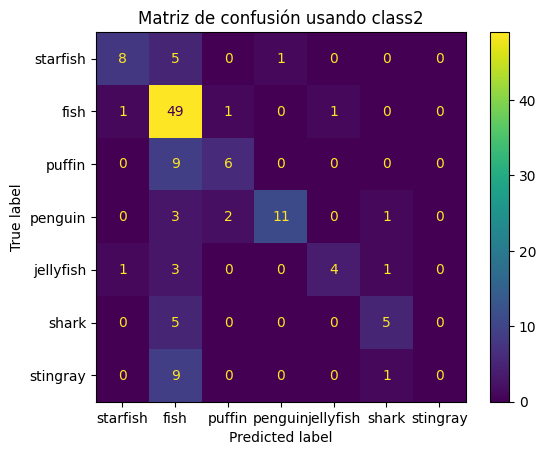

Usando la etiqueta: class3
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 503ms/step - accuracy: 0.1852 - loss: 1.9276 - val_accuracy: 0.3150 - val_loss: 1.8568
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.3067 - loss: 1.7840 - val_accuracy: 0.4252 - val_loss: 1.6801
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.3958 - loss: 1.6442 - val_accuracy: 0.4724 - val_loss: 1.5469
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.4348 - loss: 1.4628 - val_accuracy: 0.2992 - val_loss: 1.6589
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.4661 - loss: 1.3976 - val_accuracy: 0.3307 - val_loss: 1.4784
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4246 - loss: 1.3584 - val_accuracy: 0.3386 - val_loss: 1.5738
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 0.4959 - loss: 1.2812 - val_accuracy: 0.3622 - val_loss: 1.3721
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.5227 - loss: 1.1704 - val_a

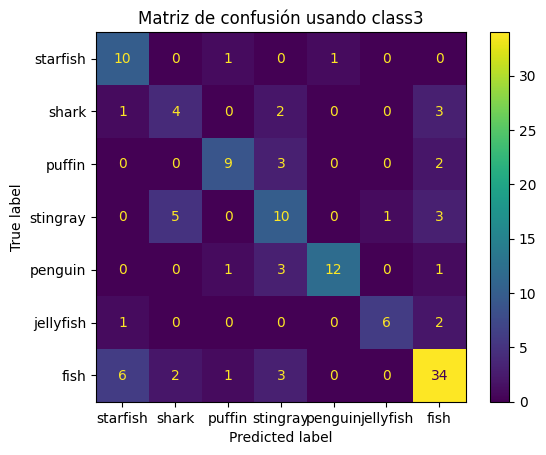

Usando la etiqueta: class4
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.2571 - loss: 1.9166 - val_accuracy: 0.3858 - val_loss: 1.7576
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4417 - loss: 1.6333 - val_accuracy: 0.3071 - val_loss: 1.6544
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.3674 - loss: 1.5354 - val_accuracy: 0.4252 - val_loss: 1.5189
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.4803 - loss: 1.3737 - val_accuracy: 0.3780 - val_loss: 1.4692
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4780 - loss: 1.3490 - val_accuracy: 0.3701 - val_loss: 1.4891
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.5036 - loss: 1.2754 - val_accuracy: 0.4567 - val_loss: 1.4180
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.5358 - loss: 1.1816 - val_accuracy: 0.4409 - val_loss: 1.4448
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.5188 - loss: 1.2077 - val_a

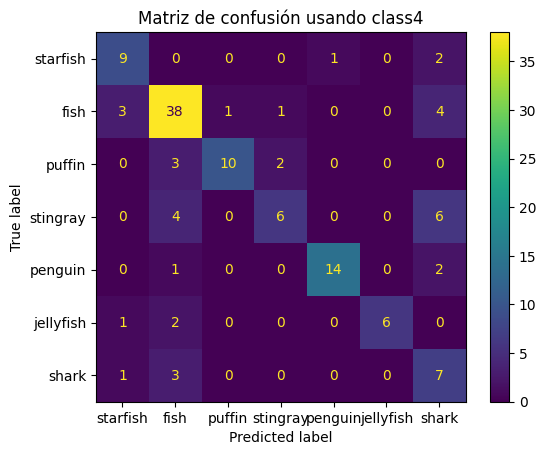

Evaluando configuración: {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005}
Usando la etiqueta: class1
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.3222 - loss: 1.8848 - val_accuracy: 0.3937 - val_loss: 1.7734
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.4451 - loss: 1.7038 - val_accuracy: 0.3937 - val_loss: 1.7579
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.4451 - loss: 1.6776 - val_accuracy: 0.3937 - val_loss: 1.7209
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.4451 - loss: 1.6219 - val_accuracy: 0.4646 - val_loss: 1.6624
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.4693 - loss: 1.5419 - val_accuracy: 0.4409 - val_loss: 1.5816
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.4739 - loss: 1.4610 - val_accuracy: 0.4016 - val_loss: 1.5271
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.4898 - loss: 1.3879 

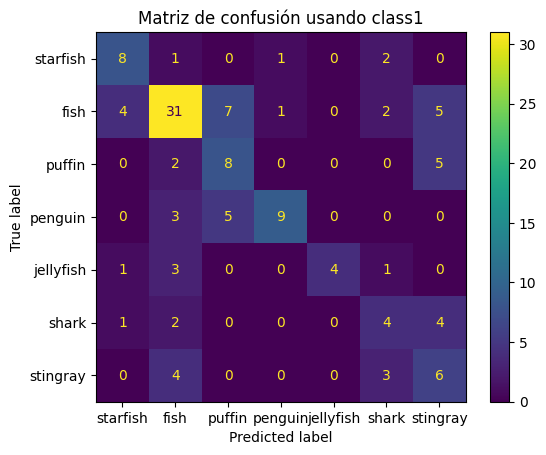

Usando la etiqueta: class2
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.3571 - loss: 1.8307 - val_accuracy: 0.4094 - val_loss: 1.7116
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.4800 - loss: 1.6116 - val_accuracy: 0.4094 - val_loss: 1.6920
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.4800 - loss: 1.5472 - val_accuracy: 0.4646 - val_loss: 1.5472
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.5002 - loss: 1.4150 - val_accuracy: 0.4646 - val_loss: 1.4682
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.5391 - loss: 1.3077 - val_accuracy: 0.4252 - val_loss: 1.4400
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.5608 - loss: 1.2619 - val_accuracy: 0.4724 - val_loss: 1.3763
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.5657 - loss: 1.1821 - val_accuracy: 0.4252 - val_loss: 1.4419
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.5329 - loss: 1.2312 - val_a

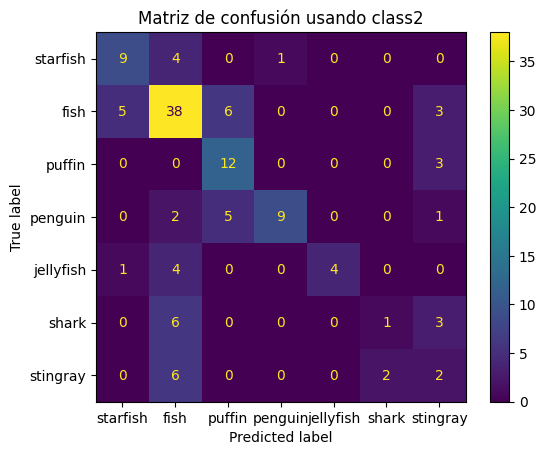

Usando la etiqueta: class3
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.2666 - loss: 1.9284 - val_accuracy: 0.3622 - val_loss: 1.8484
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.3166 - loss: 1.8097 - val_accuracy: 0.1024 - val_loss: 1.8399
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.3077 - loss: 1.7363 - val_accuracy: 0.3386 - val_loss: 1.6870
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.4071 - loss: 1.5884 - val_accuracy: 0.2677 - val_loss: 1.6665
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.3791 - loss: 1.5452 - val_accuracy: 0.1654 - val_loss: 1.8821
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.4384 - loss: 1.4874 - val_accuracy: 0.2677 - val_loss: 1.7566
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.4821 - loss: 1.4223 - val_accuracy: 0.2126 - val_loss: 1.7078
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.4716 - loss: 1.3632 - val_a

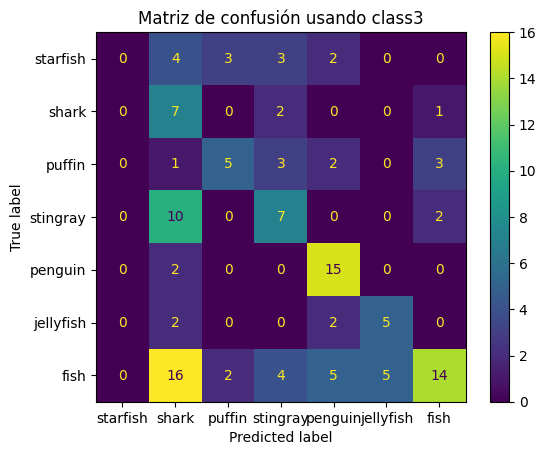

Usando la etiqueta: class4
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.3076 - loss: 1.8422 - val_accuracy: 0.3701 - val_loss: 1.7633
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.3878 - loss: 1.7257 - val_accuracy: 0.3780 - val_loss: 1.6803
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.3683 - loss: 1.6208 - val_accuracy: 0.3465 - val_loss: 1.6322
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.4136 - loss: 1.5363 - val_accuracy: 0.4094 - val_loss: 1.5702
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.4806 - loss: 1.4444 - val_accuracy: 0.4016 - val_loss: 1.5248
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.4930 - loss: 1.3790 - val_accuracy: 0.4252 - val_loss: 1.4915
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.5120 - loss: 1.3264 - val_accuracy: 0.4094 - val_loss: 1.4754
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.5259 - loss: 1.2762 - val_a

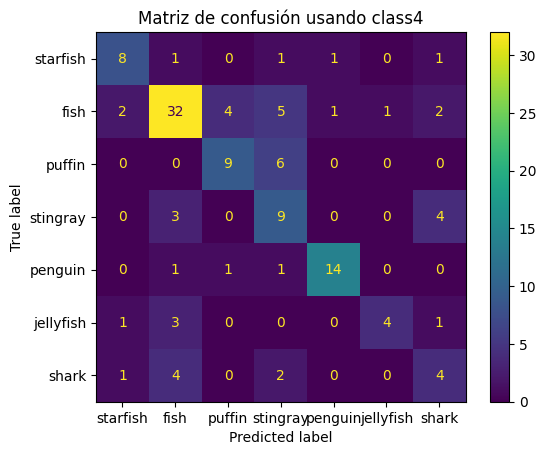

Evaluando configuración: {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
Usando la etiqueta: class1
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.2965 - loss: 1.9025 - val_accuracy: 0.3937 - val_loss: 1.7795
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4451 - loss: 1.7062 - val_accuracy: 0.3937 - val_loss: 1.7346
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4451 - loss: 1.6525 - val_accuracy: 0.3937 - val_loss: 1.6963
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.4451 - loss: 1.6093 - val_accuracy: 0.3937 - val_loss: 1.6563
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4451 - loss: 1.5656 - val_accuracy: 0.3937 - val_loss: 1.6164
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4451 - loss: 1.5222 - val_accuracy: 0.4094 - val_loss: 1.5776
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.4606 - loss: 1.4817 

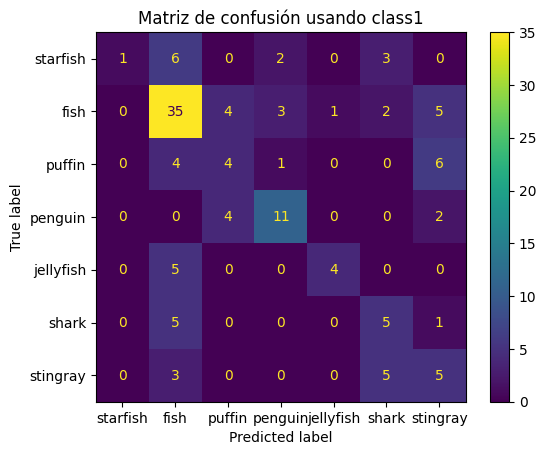

Usando la etiqueta: class2
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.4159 - loss: 1.8008 - val_accuracy: 0.4094 - val_loss: 1.7282
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4800 - loss: 1.6262 - val_accuracy: 0.4094 - val_loss: 1.6997
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 532ms/step - accuracy: 0.4800 - loss: 1.5882 - val_accuracy: 0.4094 - val_loss: 1.6640
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.4800 - loss: 1.5457 - val_accuracy: 0.4094 - val_loss: 1.6210
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4800 - loss: 1.4982 - val_accuracy: 0.4094 - val_loss: 1.5769
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4818 - loss: 1.4478 - val_accuracy: 0.4252 - val_loss: 1.5381
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.5003 - loss: 1.4028 - val_accuracy: 0.4724 - val_loss: 1.5030
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.5194 - loss: 1.3606 - val_a

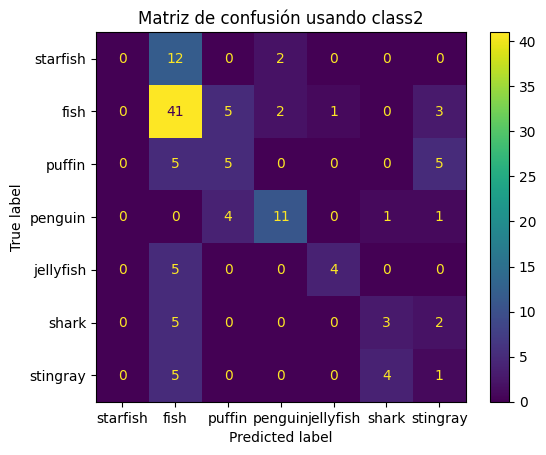

Usando la etiqueta: class3
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.2904 - loss: 1.8750 - val_accuracy: 0.3622 - val_loss: 1.8240
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.2958 - loss: 1.7972 - val_accuracy: 0.3543 - val_loss: 1.7989
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.3238 - loss: 1.7524 - val_accuracy: 0.3071 - val_loss: 1.7646
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.3304 - loss: 1.7037 - val_accuracy: 0.3150 - val_loss: 1.7320
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.3657 - loss: 1.6531 - val_accuracy: 0.3622 - val_loss: 1.6965
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.3838 - loss: 1.6011 - val_accuracy: 0.3543 - val_loss: 1.6655
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4178 - loss: 1.5540 - val_accuracy: 0.3465 - val_loss: 1.6350
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4268 - loss: 1.5122 - val_a

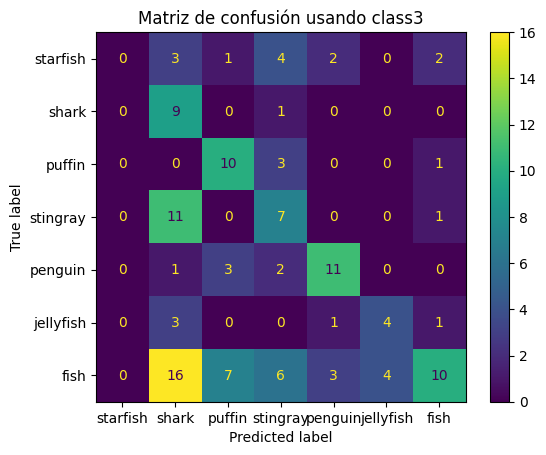

Usando la etiqueta: class4
Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 651ms/step - accuracy: 0.3557 - loss: 1.8799 - val_accuracy: 0.3701 - val_loss: 1.8061
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.3931 - loss: 1.7636 - val_accuracy: 0.3701 - val_loss: 1.7800
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step - accuracy: 0.3931 - loss: 1.7336 - val_accuracy: 0.3701 - val_loss: 1.7562
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.3931 - loss: 1.7047 - val_accuracy: 0.3701 - val_loss: 1.7255
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 0.3931 - loss: 1.6679 - val_accuracy: 0.3701 - val_loss: 1.6880
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.3931 - loss: 1.6247 - val_accuracy: 0.3622 - val_loss: 1.6465
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.3919 - loss: 1.5792 - val_accuracy: 0.4016 - val_loss: 1.6011
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.4221 - loss: 1.5299 - val_a

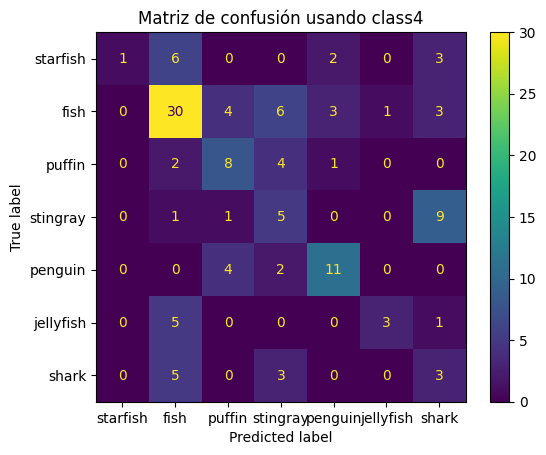

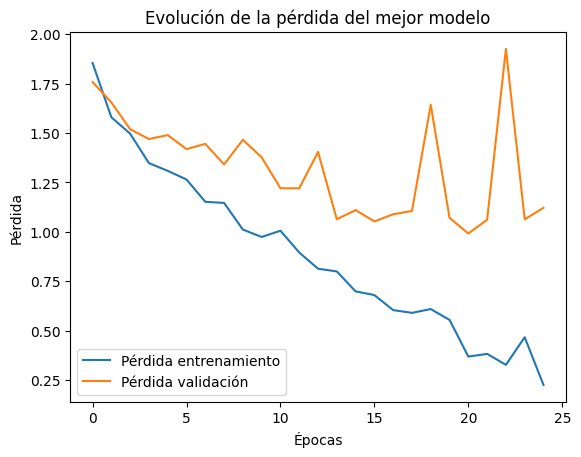

In [41]:
# Lista de columnas de clase
class_columns = ['class1', 'class2', 'class3', 'class4']

# Definir diferentes configuraciones de la red neuronal
configurations = [
    {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001},
    {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005},
    {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
]

best_model = None
best_accuracy = 0
best_history = None

for config in configurations:
    print(f"Evaluando configuración: {config}")

    for class_col in class_columns:
        print(f"Usando la etiqueta: {class_col}")

        df_train['new_label'] = df_train[class_col]
        unique_classes = df_train['new_label'].unique()[:7]
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

        df_train = df_train[df_train['new_label'].isin(unique_classes)]
        df_train['new_label'] = df_train['new_label'].map(class_mapping)
        num_classes = len(unique_classes)

        dataset = tf.data.Dataset.from_tensor_slices((
            np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
            keras.utils.to_categorical(df_train['new_label'], num_classes=num_classes)
        )).batch(64).prefetch(tf.data.AUTOTUNE)

        df_valid['new_label'] = df_valid[class_col]
        df_valid['new_label'] = df_valid['new_label'].map(class_mapping)
        df_valid = df_valid.dropna(subset=['new_label'])
        df_valid['new_label'] = df_valid['new_label'].astype(int)

        dataset_valid = tf.data.Dataset.from_tensor_slices((
            np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
            keras.utils.to_categorical(df_valid['new_label'], num_classes=num_classes)
        )).batch(64).prefetch(tf.data.AUTOTUNE)

        # Definir la arquitectura de la red
        model = keras.Sequential()
        model.add(layers.Input(shape=(64, 64, 3)))
        for i in range(3):
            model.add(layers.Conv2D(32 * (i + 1), config['kernel_sizes'][i], activation='relu', padding='same'))
            model.add(layers.MaxPooling2D(config['pool_sizes'][i]))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(num_classes, activation='softmax'))

        model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=config['learning_rate']),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(dataset, epochs=25, validation_data=dataset_valid)

        # Evaluar el modelo
        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model
            best_history = history

        # Matriz de confusión
        y_pred = np.argmax(model.predict(np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values)), axis=1)
        y_true = df_valid['new_label']
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_mapping.keys()))
        disp.plot()
        plt.title(f"Matriz de confusión usando {class_col}")
        plt.show()

# Graficar la pérdida en función de las épocas para el mejor modelo
plt.plot(best_history.history['loss'], label='Pérdida entrenamiento')
plt.plot(best_history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida del mejor modelo')
plt.show()


Como se puede ver, se han probado 3 configuraciones distintas para los tamaños de kernel, tamaños de pooling y tasa de aprendizaje:

*   Configuración 1: `{'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001}`
*   Configuración 2: `{'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005}`
*   Configuración 3: `{'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}`

Basándonos en accuracy, pérdida (loss) y validación (val_accuracy, val_loss), la Configuración 1 es la mejor opción:

*  Accuracy de entrenamiento más alta en todas las clases (excepto en CLASS3).
*  Mayor val_accuracy en promedio, con CLASS4 alcanzando 0.7087, la más alta de todas.
*  Pérdida de validación (val_loss) más baja en comparación con las otras configuraciones.
*  Menor overfitting comparado con Configuración 3.

La configuración 1 es la mejor en general, ya que logra alta precisión sin perder demasiada capacidad de generalización.

Si analizamos la accuracy y val_accuracy de cada clase dentro de Configuración 1, vemos que la mejor etiqueta es class 1.

*  Accuracy = 0.9183 (la más alta de todas las clases y configuraciones).

*  Val_accuracy = 0.6535, que sigue siendo bastante alta comparada con otras.

*  Loss y val_loss razonables, lo que indica un buen equilibrio entre aprendizaje y generalización.




También se puede apreciar que el mejor modelo comienza a sobreentrenar a partir de la época 15, por que lo que se reestablecerá el número de épocas a dicho valor.

Vamos a probar el modelo entrenado con los datos reetiquetados `class1` en los datos de test:

Entrenando modelo con Configuración 1: {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001}
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.2662 - loss: 1.9958
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.4451 - loss: 1.7383
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.4413 - loss: 1.6529
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.4015 - loss: 1.5109
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.4568 - loss: 1.4546
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.5188 - loss: 1.3435
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.5354 - loss: 1.2881
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.5259 - loss: 1.2876
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.5619 - loss: 1.2142
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.5654 - loss: 1.2030
Epoch 11/15
7

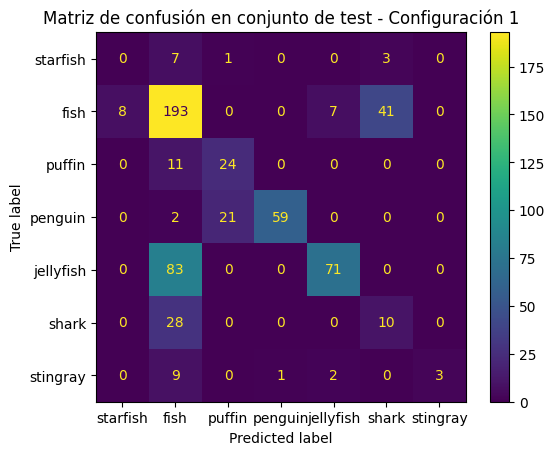

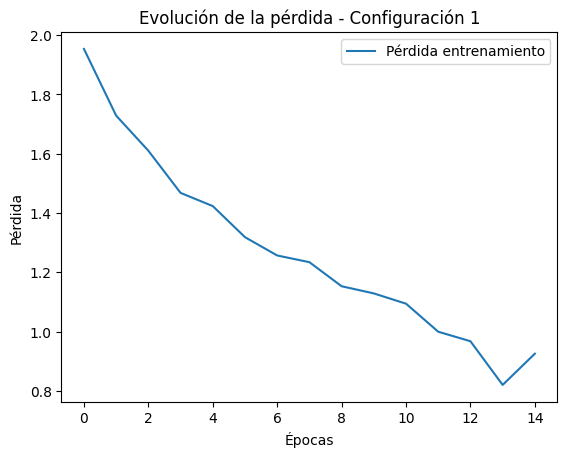

Entrenando modelo con Configuración 2: {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005}
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.3222 - loss: 1.8943
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.4451 - loss: 1.6939
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - accuracy: 0.4451 - loss: 1.6400
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.4437 - loss: 1.5259
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.4350 - loss: 1.4609
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.5057 - loss: 1.3864
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.5432 - loss: 1.3235
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.5483 - loss: 1.2823
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.5455 - loss: 1.2268
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.5698 - loss: 1.2124
Epoch 11/15


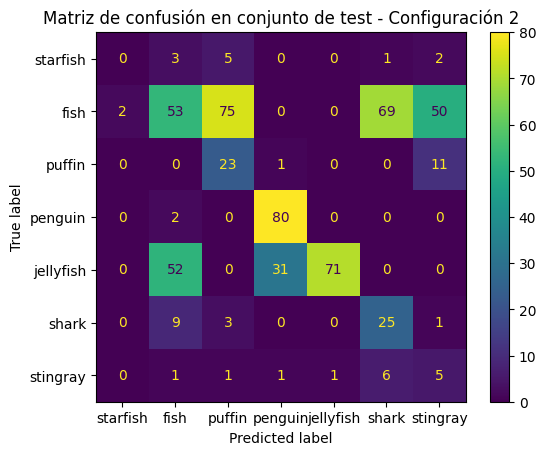

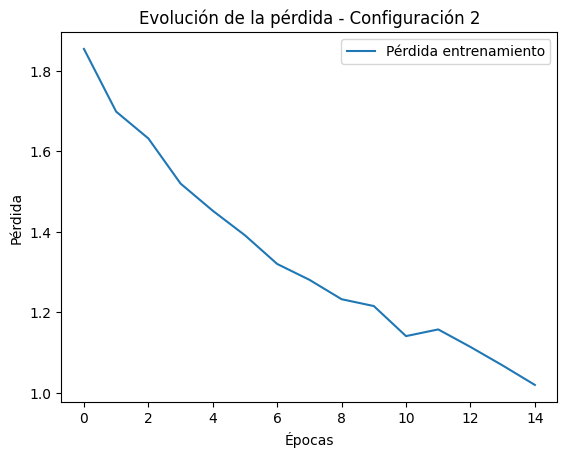

Entrenando modelo con Configuración 3: {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.3650 - loss: 1.8972
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - accuracy: 0.4451 - loss: 1.7280
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.4451 - loss: 1.6855
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.4451 - loss: 1.6603
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 482ms/step - accuracy: 0.4451 - loss: 1.6335
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4451 - loss: 1.6014
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 501ms/step - accuracy: 0.4451 - loss: 1.5651
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.4469 - loss: 1.5261
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4626 - loss: 1.4846
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.4739 - loss: 1.4440
Epoch 11/15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


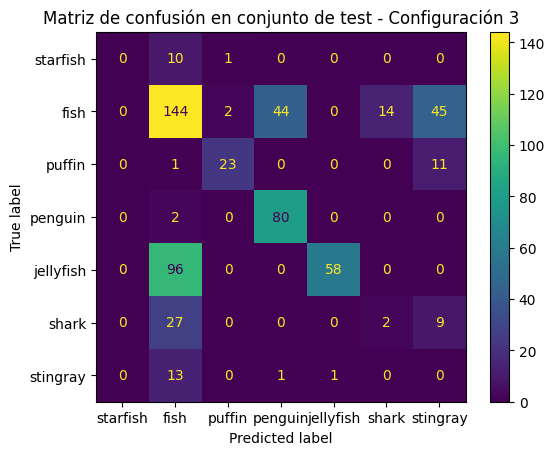

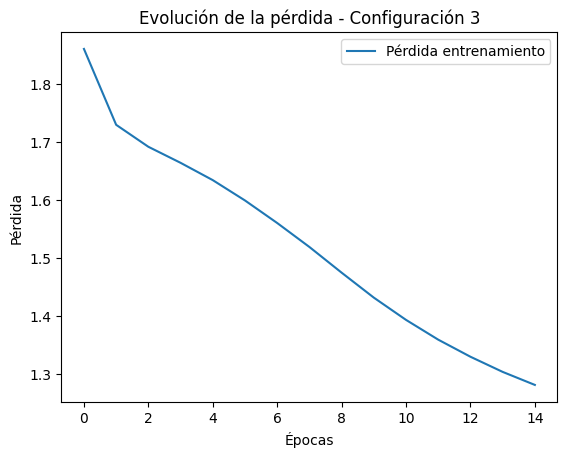

In [42]:
from sklearn.metrics import classification_report

# Definir configuraciones de la red neuronal
configurations = [
    {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001},
    {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005},
    {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
]

# Usar solo Clase 1
df_train['new_label'] = df_train['class1']
unique_classes = df_train['new_label'].unique()[:7]
class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

df_train = df_train[df_train['new_label'].isin(unique_classes)]
df_train['new_label'] = df_train['new_label'].map(class_mapping)
num_classes = len(unique_classes)

# Crear dataset de entrenamiento
dataset = tf.data.Dataset.from_tensor_slices((
    np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
    keras.utils.to_categorical(df_train['new_label'], num_classes=num_classes)
)).batch(64).prefetch(tf.data.AUTOTUNE)

# Crear dataset de prueba
df_test['new_label'] = df_test['class']
df_test['new_label'] = df_test['new_label'].map(class_mapping)
df_test = df_test.dropna(subset=['new_label'])
df_test['new_label'] = df_test['new_label'].astype(int)

dataset_test = tf.data.Dataset.from_tensor_slices((
    np.stack(df_test['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
    keras.utils.to_categorical(df_test['new_label'], num_classes=num_classes)
)).batch(64).prefetch(tf.data.AUTOTUNE)

# Entrenar y evaluar cada configuración
for i, config in enumerate(configurations):
    print(f"Entrenando modelo con Configuración {i+1}: {config}")

    # Definir la arquitectura de la red
    model = keras.Sequential()
    model.add(layers.Input(shape=(64, 64, 3)))
    for j in range(3):
        model.add(layers.Conv2D(32 * (j + 1), config['kernel_sizes'][j], activation='relu', padding='same'))
        model.add(layers.MaxPooling2D(config['pool_sizes'][j]))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=config['learning_rate']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(dataset, epochs=15)

    # Evaluar en test
    y_pred = np.argmax(model.predict(np.stack(df_test['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values)), axis=1)
    y_true = df_test['new_label']

    # Calcular métricas
    print(f"Reporte de Clasificación para Configuración {i+1}:")
    print(classification_report(y_true, y_pred, target_names=list(class_mapping.keys())))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_mapping.keys()))
    disp.plot()
    plt.title(f"Matriz de confusión en conjunto de test - Configuración {i+1}")
    plt.show()

    # Graficar la pérdida en función de las épocas
    plt.plot(history.history['loss'], label='Pérdida entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title(f'Evolución de la pérdida - Configuración {i+1}')
    plt.show()


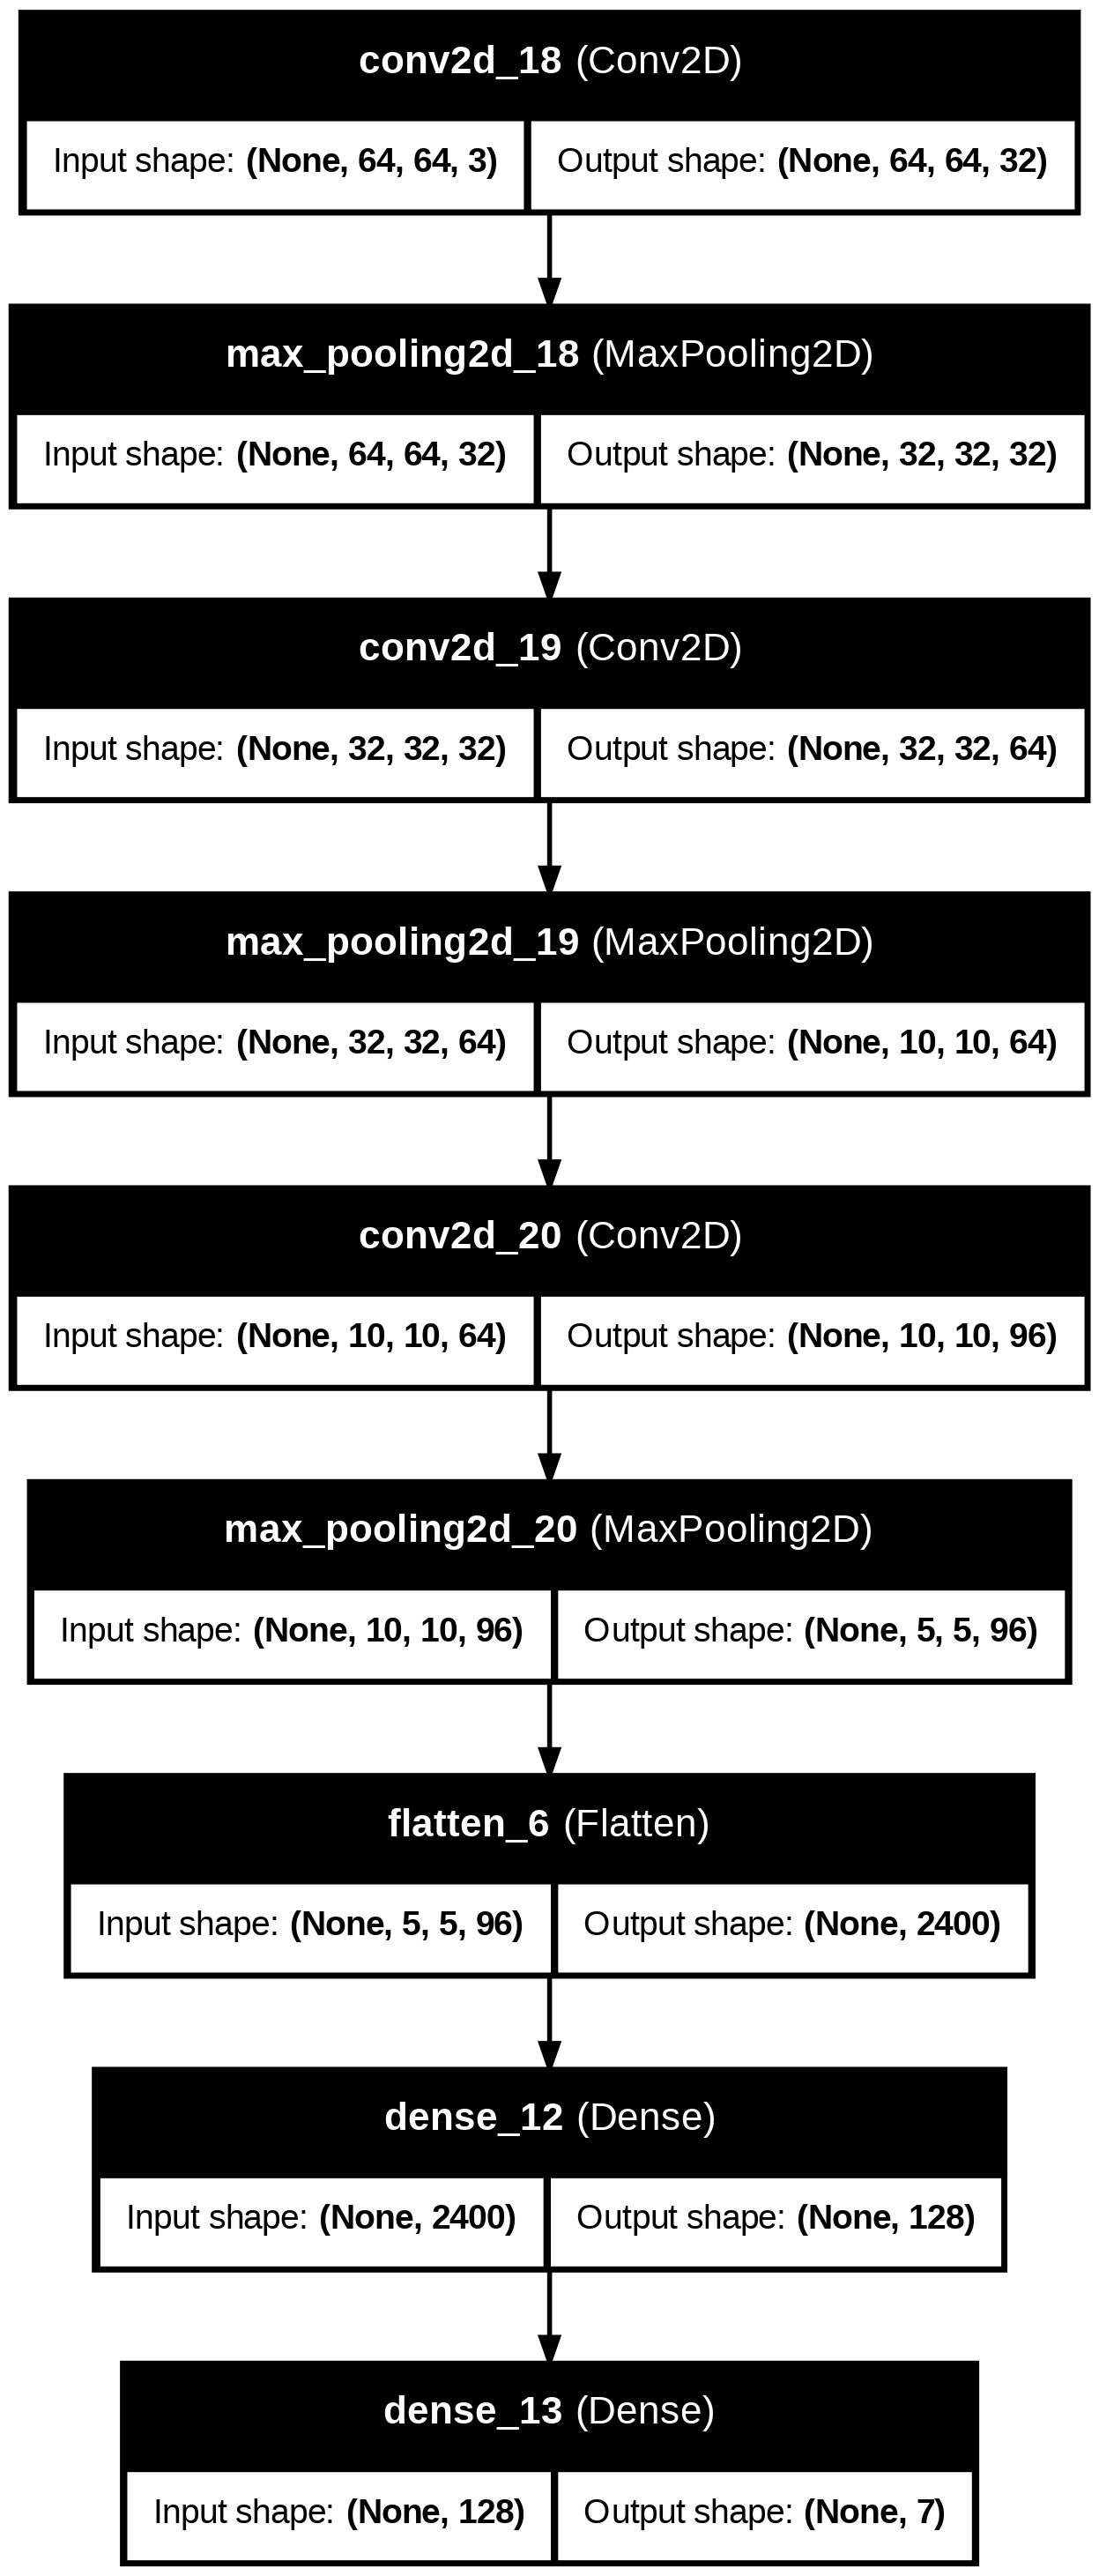

In [22]:
# Visualizar la arquitectura de la red seleccionada
!pip install pydot
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

La Configuración 1 es la mejor, con 62% de accuracy y el mayor F1-score ponderado (0.62), logrando un buen balance entre precisión y recall. Destaca en clases como penguin (F1-score 0.83) y jellyfish (0.61), pero falla en starfish y stingray (recall 0.00 y 0.20, respectivamente). Para mejorar, se podría aumentar datos de clases minoritarias.
Se pueden mejorar los modelos utilizando varias estrategias:

1. Aumentar la cantidad y diversidad de datos:
Dado que el dataset es limitado, el modelo no aprende correctamente la variabilidad de las clases. Si se tuviera más capacidad de computación, se podría aplicar aumento de datos (data augmentation) con rotaciones, cambios de iluminación y escalados para que el modelo generalice mejor.

2. Balancear las clases:
Algunas clases tienen pocos ejemplos en comparación con otras (por ejemplo, starfish (11) vs fish (249)). Esto provoca que el modelo tenga un sesgo hacia las clases más habituales en la base de datos. Técnicas como oversampling (duplicar muestras de clases minoritarias) o undersampling (reducir muestras de clases dominantes) podrían ayudar a equilibrar las predicciones.

3. Ajustar la arquitectura de la red:
Se puede probar con más filtros en las capas convolucionales, agregar capas de dropout para evitar el sobreajuste y experimentar con capas batch normalization para estabilizar el aprendizaje, entre otras cosas.

4. Optimizar los hiperparámetros:
Variar la tasa de aprendizaje: Un learning rate dinámico que disminuya con las épocas podría mejorar la convergencia del modelo.
